In [65]:
import pandas as pd

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
from sklearn.metrics.pairwise import euclidean_distances

In [69]:
import matplotlib.pyplot as plt

In [70]:
#Open file as a data Frame
df = pd.read_csv('superheroes_data.csv')

In [71]:
print(df.head())

   id         name  intelligence  strength  speed  durability  power  combat  \
0   1       A-Bomb          38.0     100.0   17.0        80.0   24.0    64.0   
1   2   Abe Sapien          88.0      28.0   35.0        65.0  100.0    85.0   
2   3     Abin Sur          50.0      90.0   53.0        64.0   99.0    65.0   
3   4  Abomination          63.0      80.0   53.0        90.0   62.0    95.0   
4   5      Abraxas          88.0      63.0   83.0       100.0  100.0    55.0   

                full-name            alter-egos  ...               race  \
0  Richard Milhouse Jones  No alter egos found.  ...              Human   
1          Abraham Sapien  No alter egos found.  ...      Icthyo Sapien   
2                     NaN  No alter egos found.  ...            Ungaran   
3            Emil Blonsky  No alter egos found.  ...  Human / Radiation   
4                 Abraxas  No alter egos found.  ...      Cosmic Entity   

              height                weight eye-color hair-color  \
0

In [72]:
print(df.columns)

Index(['id', 'name', 'intelligence', 'strength', 'speed', 'durability',
       'power', 'combat', 'full-name', 'alter-egos', 'aliases',
       'place-of-birth', 'first-appearance', 'publisher', 'alignment',
       'gender', 'race', 'height', 'weight', 'eye-color', 'hair-color',
       'occupation', 'base', 'group-affiliation', 'relatives', 'url'],
      dtype='object')


In [73]:
# Check for null values in specific needed columns
print(df[['strength', 'power', 'speed', 'intelligence']].isnull().sum())

strength        102
power           165
speed           165
intelligence    165
dtype: int64


In [74]:
# fill missing values with mean
df['strength'].fillna(df['strength'].mean(), inplace=True)
df['power'].fillna(df['power'].mean(), inplace=True)
df['speed'].fillna(df['speed'].mean(), inplace=True)
df['intelligence'].fillna(df['intelligence'].mean(), inplace=True)


In [75]:
#Scaling
df[['strength', 'power', 'speed', 'intelligence']] = scaler.fit_transform(df[['strength', 'power', 'speed', 'intelligence']])

In [76]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [77]:
#checking to make sure null values are dropped
print(df[['strength', 'power', 'speed', 'intelligence']].isnull().sum())


strength        0
power           0
speed           0
intelligence    0
dtype: int64


In [78]:
features = ['strength', 'power', 'speed', 'intelligence']

#Superman's features
superman_stats = df[df['name'] == 'Superman'][features].values

#Cosine Similarity 
df['cosine similarity'] = cosine_similarity(df[features], superman_stats).flatten()

#Sorting
top_10_cosine = df.sort_values(by='cosine similarity', ascending=False).head(11)  # Include Superman
top_10_cosine = top_10_cosine[top_10_cosine['name'] != 'Superman']  # Exclude Superman

#Top 10 most similar superheroes to Superman
top_10_cosine_result = top_10_cosine[['name', 'cosine similarity']].head(10)
print(top_10_cosine_result)


                name  cosine similarity
641   Superboy-Prime           1.000000
642        Supergirl           1.000000
523       Power Girl           1.000000
277      General Zod           0.999840
79          Beyonder           0.999606
502    One-Above-All           0.999606
409  Living Tribunal           0.999606
425  Man of Miracles           0.999606
612          Spectre           0.999581
94        Black Adam           0.999236


In [79]:
#Euclidean Distances
df['euclidean distance'] = euclidean_distances(df[features], superman_stats).flatten()

#Sorting
top_10_euclidean = df.sort_values(by='euclidean distance', ascending=True).head(11)  # Include Superman
top_10_euclidean = top_10_euclidean[top_10_euclidean['name'] != 'Superman']  # Exclude Superman

#Top 10 most similar superheroes 
top_10_euclidean_result = top_10_euclidean[['name', 'euclidean distance']].head(10)
print(top_10_euclidean_result)


                name  euclidean distance
642        Supergirl            0.000000
641   Superboy-Prime            0.000000
523       Power Girl            0.000000
277      General Zod            0.040404
612          Spectre            0.063830
79          Beyonder            0.063830
502    One-Above-All            0.063830
425  Man of Miracles            0.063830
409  Living Tribunal            0.063830
94        Black Adam            0.102977


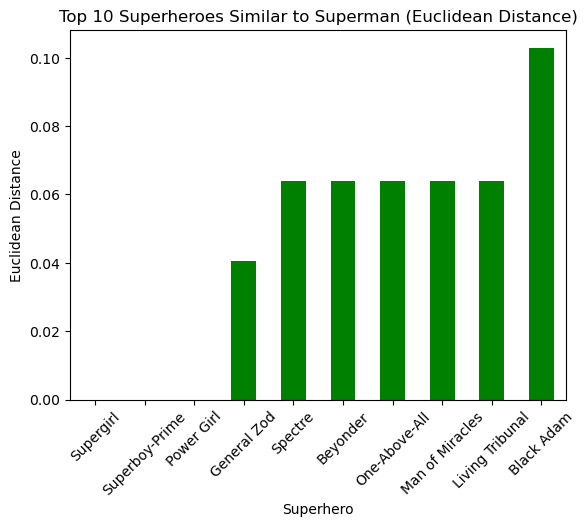

In [80]:
#BAR CHART FOR EUCLIDEAN
top_10_euclidean_result.plot(x='name', y='euclidean distance', kind='bar', color='green', legend=False)
plt.title('Top 10 Superheroes Similar to Superman (Euclidean Distance)')
plt.xlabel('Superhero')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=45)
plt.show()


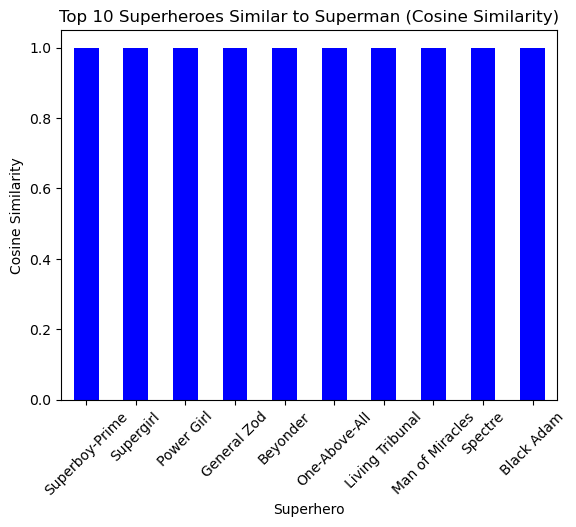

In [81]:
#BAR CHART FOR COSINE
top_10_cosine_result.plot(x='name', y='cosine similarity', kind='bar', color='blue', legend=False)
plt.title('Top 10 Superheroes Similar to Superman (Cosine Similarity)')
plt.xlabel('Superhero')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.show()
